In [1]:
import openeo
import rasterio

#Conexão com a database do copernicus sem autenticação

connection = openeo.connect(url='openeo.dataspace.copernicus.eu')

connection

<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with NullAuth>

In [4]:
# Lista dos ids que podem ser utilizados para baixar imagens
connection.list_collection_ids()


['SENTINEL3_OLCI_L1B',
 'SENTINEL3_SLSTR',
 'SENTINEL_5P_L2',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON1',
 'COPERNICUS_VEGETATION_PHENOLOGY_PRODUCTIVITY_10M_SEASON2',
 'COPERNICUS_PLANT_PHENOLOGY_INDEX',
 'ESA_WORLDCOVER_10M_2020_V1',
 'ESA_WORLDCOVER_10M_2021_V2',
 'COPERNICUS_VEGETATION_INDICES',
 'SENTINEL2_L1C',
 'SENTINEL2_L2A',
 'SENTINEL1_GRD',
 'COPERNICUS_30',
 'LANDSAT8_L2',
 'SENTINEL3_SYN_L2_SYN',
 'SENTINEL3_SLSTR_L2_LST',
 'SENTINEL1_GLOBAL_MOSAICS']

In [ ]:
# Conexão manual no site do copernicus
connection.authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=OUXP-GIYI 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


<Connection to 'https://openeo.dataspace.copernicus.eu/openeo/1.2/' with OidcBearerAuth>

In [ ]:
connection.describe_collection('SENTINEL2_L2A')

In [6]:
s2_cube = connection.load_collection('SENTINEL2_L2A',
    temporal_extent=('2022-05-01','2022-05-30'),
    spatial_extent={
        'west': 3.20,
        'south': 51.18,
        'east': 3.25,
        'north': 51.21,
        'crs': 'EPSG:4326',
    },
    bands=['B04','B03','B02'],
    max_cloud_cover=50,
)

s2_cube.download('TEST.tif')

In [ ]:
img2  = rasterio.open('TEST.tif')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-999..17912].


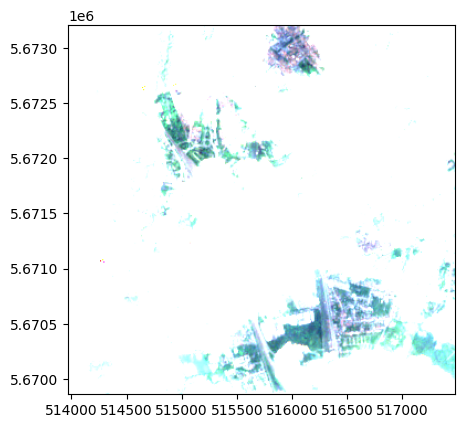

<Axes: >

In [13]:
from rasterio.plot import show
show(img2)

In [16]:
full_img = img2.read()
full_img

array([[[1198, 1088, 1160, ..., 2018, 2350, 2732],
        [1274, 1078, 1444, ..., 1620, 2004, 2448],
        [1338, 1250, 1494, ..., 1394, 1826, 2226],
        ...,
        [3840, 3432, 2962, ...,  394,  417,  560],
        [3688, 3372, 3046, ...,  334,  373,  424],
        [3440, 3320, 3200, ...,  330,  351,  387]],

       [[1150, 1154, 1328, ..., 2126, 2476, 2778],
        [1172, 1256, 1412, ..., 1690, 2168, 2530],
        [1230, 1432, 1368, ..., 1454, 1918, 2276],
        ...,
        [3828, 3484, 2928, ...,  664,  802, 1030],
        [3744, 3432, 3030, ...,  597,  686,  840],
        [3564, 3408, 3112, ...,  626,  657,  785]],

       [[1120,  918, 1124, ..., 2186, 2536, 2878],
        [1136,  878, 1350, ..., 1792, 2188, 2574],
        [1188, 1070, 1402, ..., 1578, 2064, 2326],
        ...,
        [3832, 3428, 2718, ...,  598,  694,  818],
        [3752, 3400, 2820, ...,  450,  496,  578],
        [3576, 3588, 2912, ...,  422,  491,  539]]],
      shape=(3, 335, 351), dtype=int1

In [29]:
num_bands = img2.count
print('Número de bandas na imagem =',num_bands)

Número de bandas na imagem = 3


In [9]:
img2_band1 = img2.read(1)
img2_band2 = img2.read(2)
img2_band3 = img2.read(3)
img2_band1


array([[1198, 1088, 1160, ..., 2018, 2350, 2732],
       [1274, 1078, 1444, ..., 1620, 2004, 2448],
       [1338, 1250, 1494, ..., 1394, 1826, 2226],
       ...,
       [3840, 3432, 2962, ...,  394,  417,  560],
       [3688, 3372, 3046, ...,  334,  373,  424],
       [3440, 3320, 3200, ...,  330,  351,  387]],
      shape=(335, 351), dtype=int16)

Text(0.5, 1.0, 'Band 3: B02')

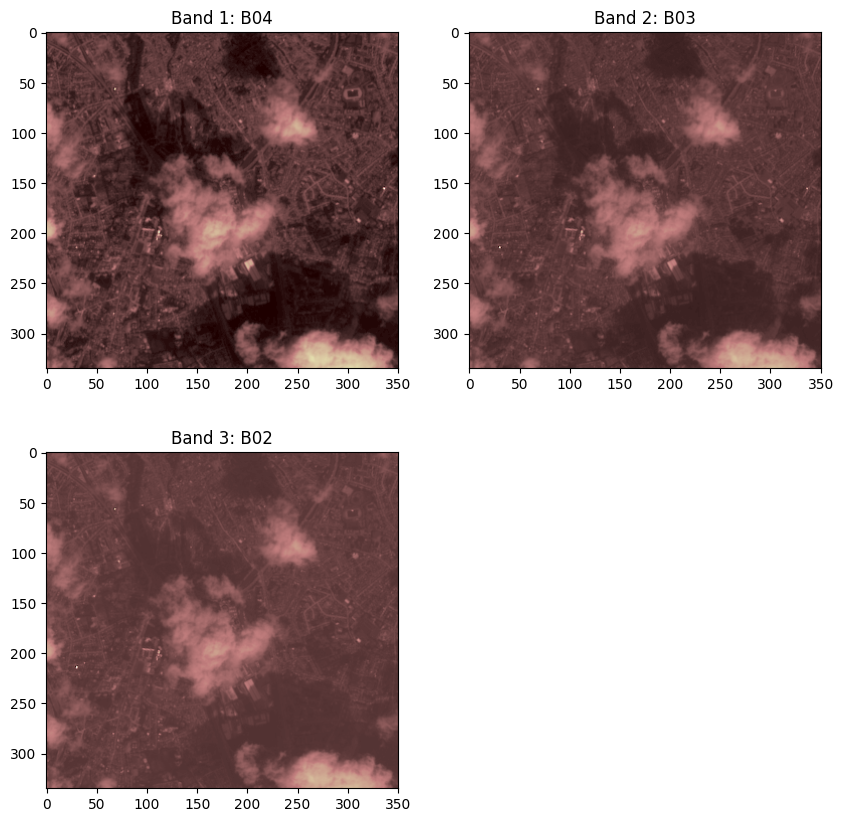

In [10]:
from matplotlib import pyplot as plt 


fig = plt.figure(figsize=(10,10))


ax1 = fig.add_subplot(2, 2, 1)
ax1.imshow(img2_band1, cmap='pink')
ax1.set_title('Band 1: B04')


ax2 = fig.add_subplot(2, 2, 2)
ax2.imshow(img2_band2, cmap='pink')
ax2.set_title('Band 2: B03')


ax3 = fig.add_subplot(2, 2, 3)
ax3.imshow(img2_band3, cmap='pink')
ax3.set_title('Band 3: B02')


In [55]:
print('Referência de coordenada:', img2.crs)

Referência de coordenada: EPSG:32631


In [58]:
metadata = img2.meta
print('Metadata: {metadata}\n'.format(metadata=metadata))

Metadata: {'driver': 'GTiff', 'dtype': 'int16', 'nodata': -32768.0, 'width': 351, 'height': 335, 'count': 3, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 31N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",3],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32631"]]'), 'transform': Affine(10.0, 0.0, 513970.0,
       0.0, -10.0, 5673210.0)}



In [59]:
desc = img2.descriptions
print('Raster description: {desc}\n'.format(desc=desc))

Raster description: ('B04', 'B03', 'B02')



In [60]:

print('Geotransform: ',img2.transform)

Geotransform:  | 10.00, 0.00, 513970.00|
| 0.00,-10.00, 5673210.00|
| 0.00, 0.00, 1.00|


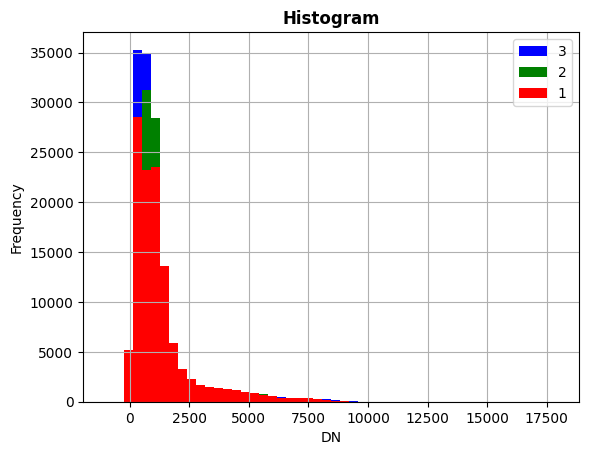

In [61]:
rasterio.plot.show_hist(full_img, bins=50, histtype='stepfilled', lw=0.0, stacked=False)

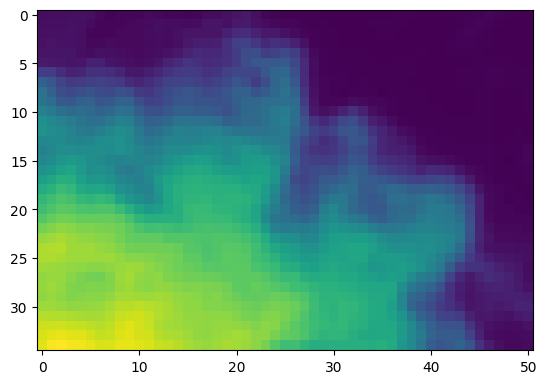

In [17]:
clipped_img = full_img[:, 300:900, 300:900]
plt.imshow(clipped_img[0,:,:])

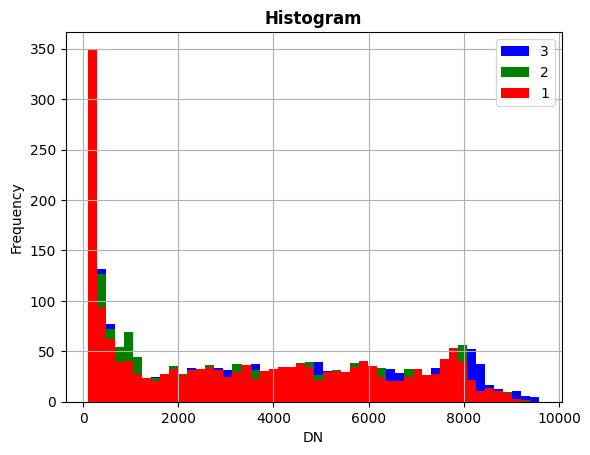

In [19]:
rasterio.plot.show_hist(clipped_img, bins=50,lw=0.0,histtype='stepfilled',stacked=False)

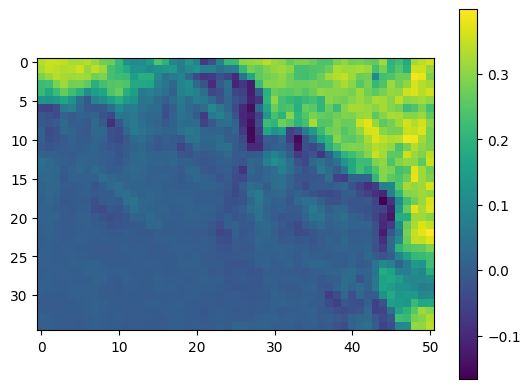

In [23]:
red_clipped = clipped_img[0].astype('f4')
red_clipped
nir_clipped = clipped_img[1].astype('f4')
ndvi_clipped = (nir_clipped - red_clipped) / (nir_clipped + red_clipped)

plt.imshow(ndvi_clipped, cmap='viridis')
plt.colorbar()
